# Contenido del proyecto <a id='back'></a>

* [Introducciòn](#intro)
* [Informaciòn general de los datos](#informacion)
* [Preprocesamiento de datos](#Preprocesamiento)
* [Anàlisis de la informaciòn](#analisis)
* [Conclusiones](#conclusiones)

# Introducciòn <a id='intro'></a>

La base de datos contiene informaciòn aportada por una lìnea de gimnasios, que contiene datos sobre la cancelaciòn de la suscripciòn al servicio por parte de los usuarios en un mes e informaciòn del mes anterior. El anàlisis de la informaciòn de èstos datos se realizarà con el fin de identificar las razones mas comunes por las cuales los clientes cancelan la suscripciòn al servicio y recomendar estrategias para la retenciòn de clientes.

# Informaciòn general de los datos <a id='informacion'></a>

Inicialmente se cargan las librerìas necesarias para el anàlisis de los datos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
import mpl_toolkits.axisartist as axisartist

Se carga el dataset que contiene la informaciòn de los datos.

In [2]:
users_gym=pd.read_csv('/datasets/gym_churn_us.csv')

Se carga la informaciòn general de los datos.

In [3]:
users_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

No se evidencian datos ausentes en los datos.

Los tipos de datos para las columnas se consideran que no es necesario modificarlas.

Se considera importante cambiar los nombres de las columnas a minùsculas para facilitar la manipulaciòn de los datos.

In [4]:
users_gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Se identifica si existen datos duplicados.

In [5]:
users_gym.duplicated().sum()

0

No se identifican datos duplicados.

**Se eidentifican los valores promedio y desviaciòn estàndar para cada columna.**

In [6]:
users_gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


# Preprocesamiento de datos <a id='preprocesamiento'></a>

**Los nombres de las columnas se cambian por minùsculas**

In [7]:
users_gym.columns=users_gym.columns.str.lower() #Los nombres de las columnas se modifican para que se encuentren en minùscula

In [8]:
users_gym

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


# Anàlisis de la informaciòn <a id='analisis'><a/>

**Se identifican los valores medios para los usuarios que cancelaron y los que permanecen utilizando el servicio**

In [9]:
users_churn=users_gym.groupby('churn').mean()
users_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Se identifican las distribuciones de las caracterìsticas de los usuarios que cancelaron y para los que permanecen.**

**Para analizar las distribuciones, se utilizan histogramas**

**Se define una funciòn para analizar las distribuciones de las caracterìsticas**

In [10]:
def distr_cancel_caracter(df, column_object, caracteristica):
    cancel=df.groupby(column_object)[caracteristica].value_counts(normalize=True)
    cancel.name='frecuencia'
    cancel=cancel.to_frame().reset_index()
    
    #Creaciòn del histograma
    sns.barplot(data=cancel, x=column_object, y='frecuencia', hue=caracteristica)
    plt.title('Gráfico ' + column_object + ' vs ' + caracteristica)

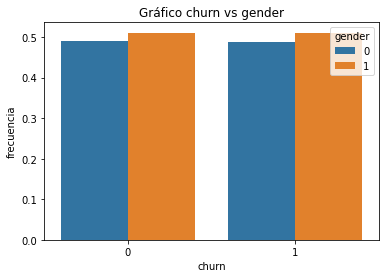

In [11]:
distr_cancel_caracter(users_gym,'churn','gender')

La distribución de los usuarios que cancelaron que son hombres o mujeres se consideran datos muy parecidos.

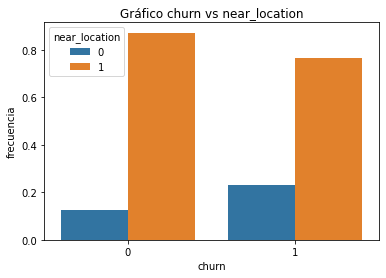

In [12]:
distr_cancel_caracter(users_gym,'churn','near_location')

De acuerdo con el histograma que relaciona la cancelación del servicio con la cercanía al gimnasio, se identifica que la mayor cantidad de usuarios que cancelaron viven en zona cercana al gimnasio.

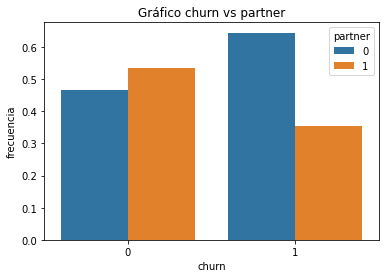

In [13]:
distr_cancel_caracter(users_gym,'churn','partner')

De acuerdo con el histograma que relaciona la distribución de la cancelación o no del servicio y la utilización de un patrocinador por parte los usuarios, se identifica mayor distribución de usuarios que no utilizaron un patrocinador.

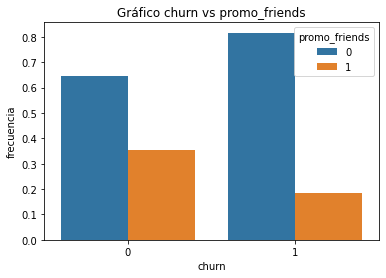

In [14]:
distr_cancel_caracter(users_gym,'churn','promo_friends')

De acuerdo con el histograma, se identifica mayor cancelaciòn para los usuarios que no utilizaron la promociòn por parte de un amigo.

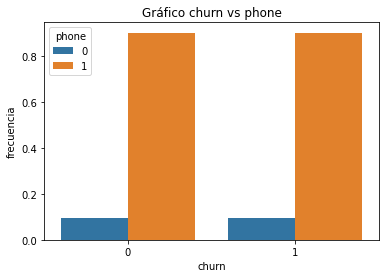

In [15]:
distr_cancel_caracter(users_gym,'churn','phone')

La distribución entre los usuarios que cancelaron y los que continúan con el servicio, y los usuarios que aportaron su contacto telefónico  y los que no, se consideran datos muy parecidos (pocas personas no aportaron su número de contacto).

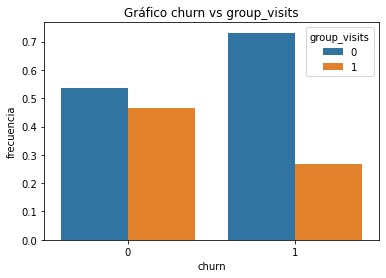

In [16]:
distr_cancel_caracter(users_gym,'churn','group_visits')

De acuerdo con el histograma los usuarios usuarios que cancelan, en su mayorìa no participan de sesiones grupales.

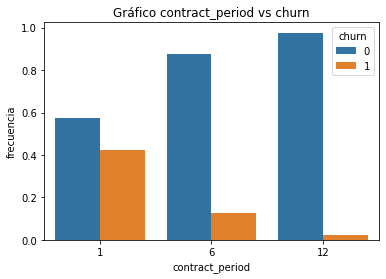

In [17]:
distr_cancel_caracter(users_gym,'contract_period','churn')

De acuerdo con el histograma, entre mayor es el tiempo de contrato menor es el número de cancelaciones por parte de los usuarios.

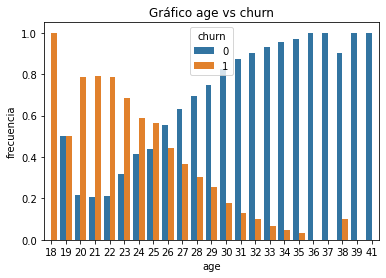

In [18]:
distr_cancel_caracter(users_gym,'age','churn',)

De acuerdo con el histograma, la tendencia a cancelar por parte de los usuarios es mayor para los usuarios mas jóvenes.

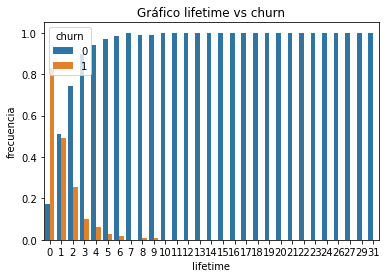

In [19]:
distr_cancel_caracter(users_gym,'lifetime','churn')

La distribución de usuarios que cancelan es menor para los usuarios que han permanecido en el gimnasio por mas tiempo, es decir que entre mas tiempo en meses por parte de los usuarios menor es la cancelación.

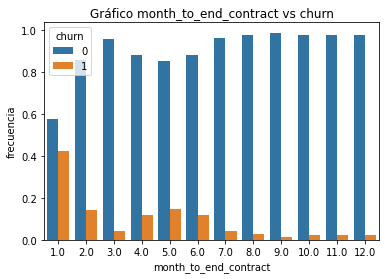

In [20]:
distr_cancel_caracter(users_gym,'month_to_end_contract','churn')

De acuerdo con el histograma, se identifica que entre mas tiempo haya pasado desde que el usuario llega por primera vez menor es la cancelaciòn del servicio.

**Se analiza la relaciòn de las caracterìsticas cuantitativas con la cancelaciòn del servicio**

**Se filtran los usuarios que no cancelan el servicio.**

In [21]:
churn_0=users_gym.query('churn==0')

In [22]:
churn_0

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


**Se filtran los usuarios que cancelan el servicio.**

In [23]:
churn_1=users_gym.query('churn==1')

In [24]:
churn_1

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,1,1,0,0,1,1,0,24,135.395712,1.0,0,1.390251,0.789321,1
3984,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915,1
3986,0,1,1,1,1,1,1,34,226.804845,1.0,0,1.399529,0.304130,1
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1


**Se grafican histogramas para verificar la relaciòn de las caracterìsticas cuantitativas con la cancelaciòn o no del servicio**

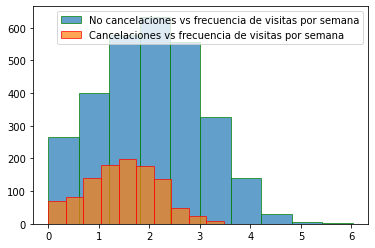

In [25]:
plt.hist(churn_0['avg_class_frequency_total'],label='No cancelaciones vs frecuencia de visitas por semana',alpha=0.7,edgecolor='green')
plt.hist(churn_1['avg_class_frequency_total'],label='Cancelaciones vs frecuencia de visitas por semana',alpha=0.7,edgecolor='red')
plt.legend()
plt.show()

De acuerdo con el histograma, los usuarios que cancelan frecuentan menos el gimnasio en la semana .

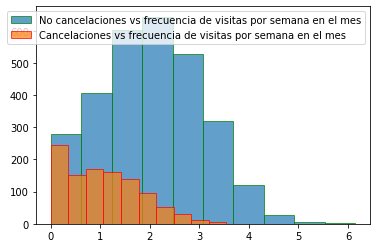

In [26]:
plt.hist(churn_0['avg_class_frequency_current_month'],label='No cancelaciones vs frecuencia de visitas por semana en el mes',alpha=0.7,edgecolor='green')
plt.hist(churn_1['avg_class_frequency_current_month'],label='Cancelaciones vs frecuencia de visitas por semana en el mes',alpha=0.7,edgecolor='red')
plt.legend()
plt.show()

Los usuarios que cancelan, frecuentan menos el gimnasio en semana en el mes.

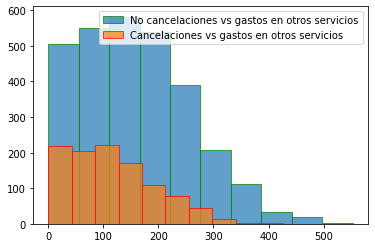

In [27]:
plt.hist(churn_0['avg_additional_charges_total'],label='No cancelaciones vs gastos en otros servicios',alpha=0.7,edgecolor='green')
plt.hist(churn_1['avg_additional_charges_total'],label='Cancelaciones vs gastos en otros servicios',alpha=0.7,edgecolor='red')
plt.legend()
plt.show()

Los usuarios que tienden a gastar menor cantidad de dinero en otros servicios, tienden a reportar mayor cantidad de cancelaciones.

**Se crea una matrìz de correlaciòn para verificar la relaciòn entre las caracterìsticas.**

In [28]:
corr=users_gym.corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


Para todas las variables, se identifica que "churn" tiene una correlaciòn negativa; de las cuales se identifica que la correlaciòn negativa mas alta se manifiesta en las caracterìsticas: lifetime, avg_class_frequency_current_month, contract_period, month_to_end_contract y avg_class_frequency_total. La variable "churn" no tiene entonces una correlaciòn significativa con las demàs variables.

**Se crea mapa de calor**

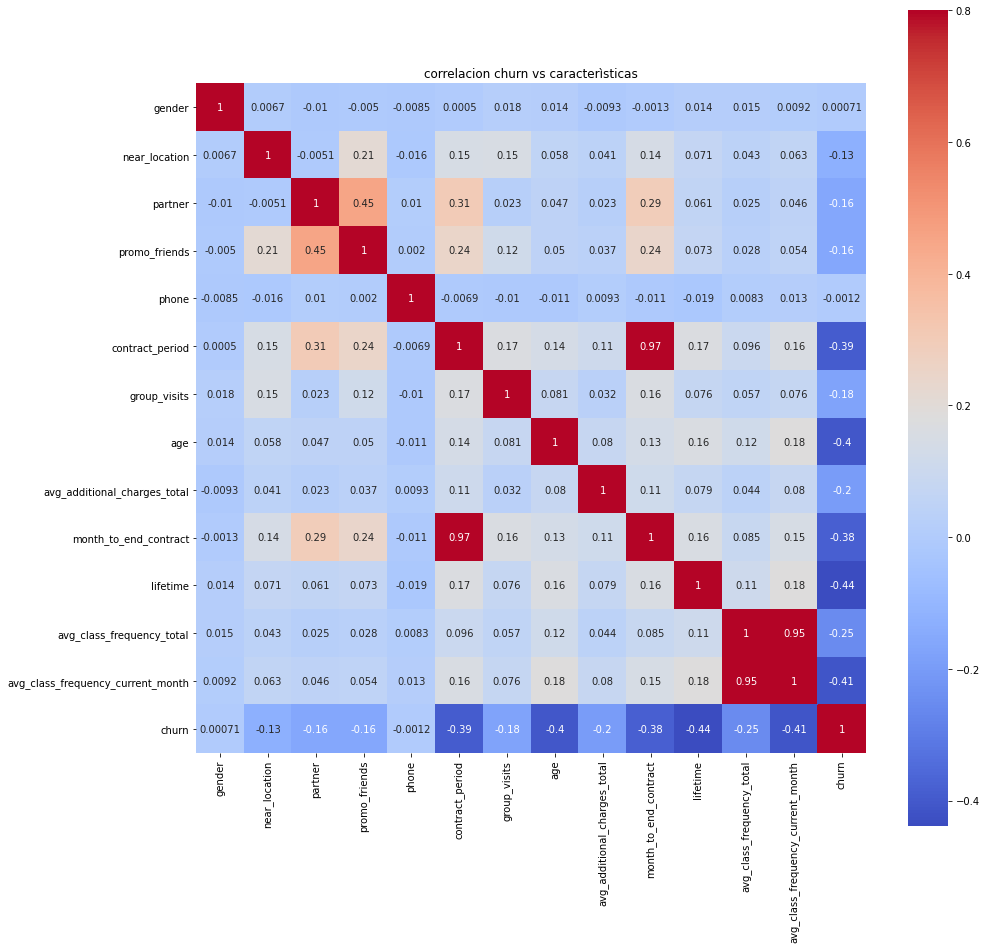

In [29]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,vmax=0.8,annot=True,square=True,cmap='coolwarm')
plt.title('correlacion churn vs caracterìsticas')
plt.show()

**Se crea un modelo para predecir la cancelaciòn de los usuarios**

Para crear el modelo inicialmente se dividen los datos en caracterìsticas y una variable objetivo.

In [30]:
X=users_gym.drop(['churn'],axis=1)

In [31]:
y=users_gym['churn']

Se segmentan los datos con train_test_split(), para dividir los datos de entrenamiento y prueba.

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Se crea el objeto de clase scaler.

In [33]:
scaler=StandardScaler()

Se transforma la matrìz para el conjunto de entrenamiento.

In [35]:
X_train_st=scaler.fit_transform(X_train)

Se transforma la matrìz para el conjunto de prueba.

In [36]:
X_test_st=scaler.transform(X_test)

**Se entrena el modelo con el set de entrenamiento con los mètodos de regresiòn logìstica y bosque aleatorio.**

**Modelo de regresiòn logìstica(LogisticRegression)**

In [37]:
model_rl=LogisticRegression(random_state=0,solver='liblinear')

Se entrena el modelo.

In [38]:
model_rl.fit(X_train_st,y_train)

LogisticRegression(random_state=0, solver='liblinear')

Se hacen las previsiones.

In [39]:
predictions_rl=model_rl.predict(X_test_st)

In [40]:
probabilities_rl=model_rl.predict_proba(X_test_st)

Se calculan las mètricas de clasificaciòn para el modelo de regresiòn logìstica.

In [41]:
print('Exactitud: {:.3f}'.format(accuracy_score(y_test, predictions_rl)))
print('Precisión: {:.3f}'.format(precision_score(y_test, predictions_rl)))
print('Recall: {:.3f}'.format(recall_score(y_test, predictions_rl)))

Exactitud: 0.922
Precisión: 0.854
Recall: 0.828


**Modelo de bosque aleatorio(RandomForestClassifier)**

In [42]:
model_ba=RandomForestClassifier(random_state=0, n_estimators=100)

se entrena el modelo.

In [43]:
model_ba.fit(X_train_st,y_train)

RandomForestClassifier(random_state=0)

Se hacen las previsiones con el modelo de bosque aleatorio.

In [44]:
predictions_ba=model_ba.predict(X_test_st)

In [45]:
probabilities_ba=model_ba.predict_proba(X_test_st)

Se calculan las mètricas de clasificaciòn para el modelo de regresiòn logìstica.

In [46]:
print('Exactitud: {:.3f}'.format(accuracy_score(y_test, predictions_ba)))
print('Precisión: {:.3f}'.format(precision_score(y_test, predictions_ba)))
print('Recall: {:.3f}'.format(recall_score(y_test, predictions_ba)))

Exactitud: 0.915
Precisión: 0.839
Recall: 0.813


De acuerdo con los resultados de los dos modelos, se identifica que las metricas exactitud, precisiòn y recall son un poco mayores para el modelo de regresiòn lineal.

**Se realiza el clùster de usuarios**

In [46]:
sc=StandardScaler() #Se estandarizan los datos.

Se elimina la columna "churn", para transformar las demàs columnas.

In [47]:
users_gym_no_churn=users_gym.drop('churn',axis=1)

In [48]:
X_sc=sc.fit_transform(users_gym_no_churn) #Se trasnforman los datos.

In [49]:
linked=linkage(X_sc,method='ward')

**Se genera el dendograma**

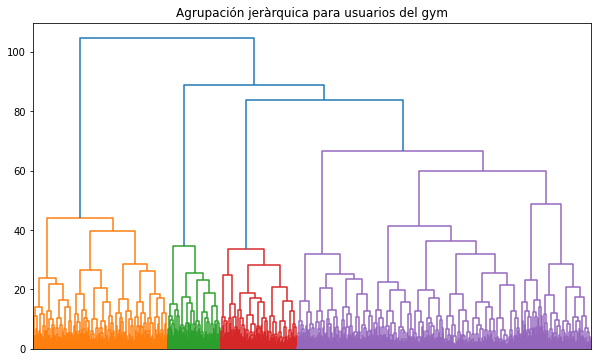

In [50]:
plt.figure(figsize=(10,6))
dendrogram(linked, orientation='top')
plt.xticks([])
plt.title('Agrupación jeràrquica para usuarios del gym')
plt.show()

De acuerdo con el gràfico, se pueden destacar 4 clùsteres.

**Entrenamos el modelo clùstering para predecir los clùsters de clientes**

In [51]:
km=KMeans(n_clusters=5,random_state=0) # Se define el modelo K_means con 5 clùsters

In [52]:
labels=km.fit_predict(X_sc) #Se predicen los clùsters para las observaciones.

In [53]:
users_gym_no_churn['cluster_km']=labels # Se almacenan las etiquetas de clùster en los datos.

In [54]:
users_gym_no_churn['cluster_km'].value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster_km, dtype: int64

**Se obtienen los valores medios de caracterìsticas para clùsteres**

In [55]:
km.cluster_centers_

array([[-0.01356529,  0.31552772,  0.59261496,  0.57662146,  0.32681319,
         1.36568854,  0.26585013,  0.24612792,  0.14404709,  1.34476956,
         0.26985253,  0.10590175,  0.19719616],
       [ 0.02366082,  0.04724705, -0.03325194, -0.00434424, -3.05985201,
         0.02324902,  0.02788078,  0.03592699, -0.03099391,  0.03640728,
         0.05333051, -0.0327118 , -0.04814235],
       [-0.03040738, -2.33709981, -0.04678376, -0.49643841,  0.32681319,
        -0.51191571, -0.39900969, -0.21701381, -0.11922153, -0.50700192,
        -0.24403795, -0.22482651, -0.27520459],
       [-0.0498058 ,  0.42788074, -0.2720912 , -0.1485145 ,  0.32681319,
        -0.60001438, -0.14423666, -0.31245911, -0.15929411, -0.58769402,
        -0.34201708, -0.648823  , -0.71544299],
       [ 0.09885252,  0.36189075, -0.25998749, -0.16928796,  0.32277183,
        -0.44223748,  0.12493307,  0.2888459 ,  0.15272611, -0.44462503,
         0.31311849,  1.00088308,  1.02881465]])

In [56]:
centroids_df=pd.DataFrame(scaler.inverse_transform(km.cluster_centers_),columns=X_train.columns)

In [57]:
centroids_df=centroids_df.reset_index()

In [58]:
centroids_df.rename(columns={"index": "centroid"}, inplace=True)
centroids_df

,centroid,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.514473,0.941222,0.792549,0.550064,0.986972,10.824108,0.518343,30.242664,159.235496,9.929362,4.667600,1.973085,1.982247
1,1,0.533070,0.838152,0.479624,0.286781,-0.108594,4.718244,0.402341,29.542218,143.003010,4.435379,3.889219,1.839154,1.727393
2,2,0.506060,-0.077884,0.472859,0.063773,0.986972,2.284136,0.194246,28.699352,134.821193,2.153533,2.820202,1.653529,1.491525
3,3,0.496370,0.984386,0.360208,0.221446,0.986972,1.883434,0.318439,28.381303,131.105048,1.814696,2.467974,1.243856,1.034212
4,4,0.570632,0.959034,0.366260,0.212032,0.985665,2.601056,0.449651,30.385011,160.040348,2.415462,4.823138,2.837833,2.846120


In [59]:
features = [col for col in users_gym.select_dtypes(include=np.number).columns.tolist() if col != "churn"]

In [60]:
centroids_df_melt = centroids_df.melt(
    id_vars="centroid",
    value_vars=features,
    var_name="feature",
    value_name="feature_value"
)

**Se crea un histograma para analizar las distribuciones de las caracterìsticas para los clùsteres**

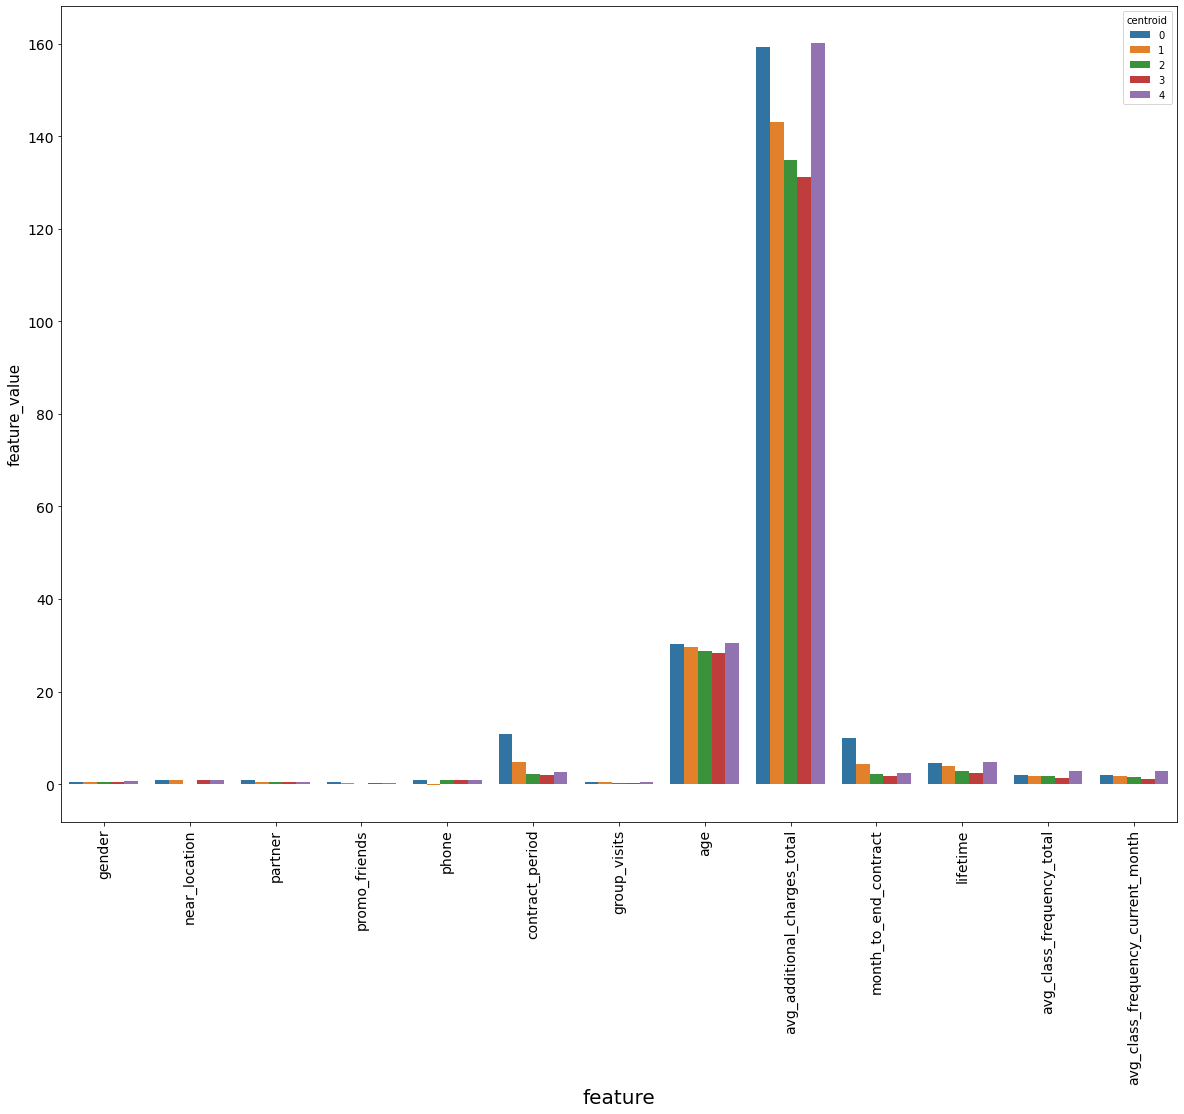

In [61]:
plt.figure(figsize=(20, 15))
my_plot=sns.barplot(data=centroids_df_melt, x="feature", y="feature_value", hue="centroid", 
                    ax=plt.gca())
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, ha='center', minor=False)
plt.xlabel('feature', fontsize=20);
plt.ylabel('feature_value', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

De acuerdo con el histograma que relaciona los clùsters con las caracterìsticas "avg_additional_charges_tota" y "edad" tienen mayor distribuciòn dentro de los cinco clùsteres. las caracterìsticas "gender", "partner" y "promo_friends" se distribuyen menos dentro de los 5 clùsteres.

**Se calcula la tasa de cancelaciòn para cada clùster**

Se tiene en cuenta nuevamente la columna "churn".

In [62]:
users_gym_no_churn['churn']=y_test.reset_index(drop=True)

In [63]:
users_gym_no_churn.groupby('cluster_km')['churn'].mean().sort_values(ascending=False)

cluster_km
2    0.325581
3    0.251908
0    0.244898
4    0.224852
1    0.206897
Name: churn, dtype: float64

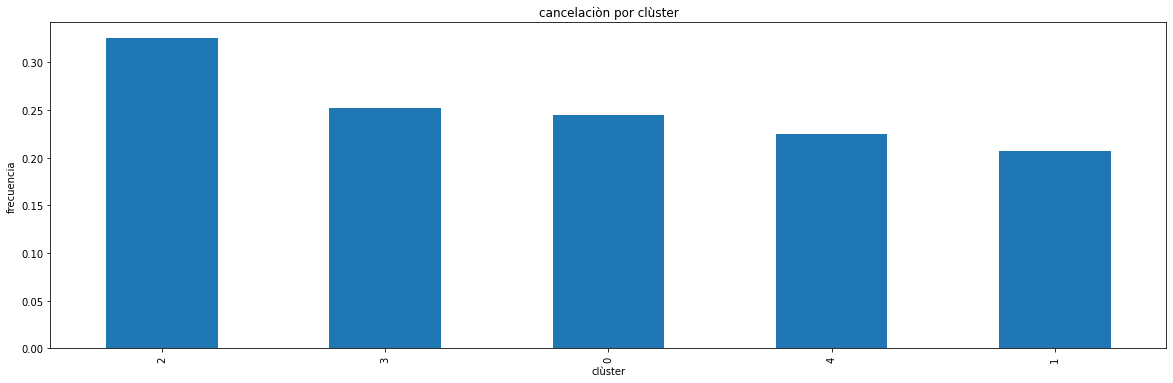

In [64]:
users_gym_no_churn.groupby('cluster_km')['churn'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,6))
plt.title('cancelaciòn por clùster')
plt.xlabel('clùster')
plt.ylabel('frecuencia')
plt.show()

Se evidencia mayor tasa de cancelaciòn en el clùster del grupo 2 (32.5%).

# Conclusiones <a id='conclusiones'></a>

En la base de datos no se identificaron datos ausentes ni duplicados.

Sòlo se considerò necesario cambiar los nombres de las columnas a minùsculas.

La distribución de los usuarios que cancelaron que son hombres o mujeres se consideran datos muy parecidos; por lo cual no es un dato muy relevante para las cancelaciones.

De acuerdo con el histograma que relaciona la cancelación del servicio con la cercanía al gimnasio, se identifica que la mayor cantidad de usuarios que cancelaron viven en zona cercana al gimnasio; por lo cual vivir cerca no influye en que los usuarios permanezcan utilizando el servicio.

Se identifica que utilizar un patrocinador no influye mucho en la retenciòn de los clientes; ya que se identifica que hay mayor distribución de cancelaciones para los clientes que no utilizaron un patrocinador.

Se identifica mayor cancelación para los usuarios que no utilizaron la promoción por parte de un amigo.
Los usuarios que cancelan, en su mayoría no participan de sesiones grupales.

Con respecto al tiempo del contrato, entre mayor es el tiempo de contrato menor es el número de cancelaciones por parte de los usuarios.

la tendencia a cancelar por parte de los usuarios es mayor para los usuarios más jóvenes.

La distribución de usuarios que cancelan es menor para los usuarios que han permanecido en el gimnasio por más tiempo, es decir que entre más tiempo en meses por parte de los usuarios menor es la cancelación.

Se identifica que entre más tiempo haya pasado desde que el usuario llega por primera vez menor es la cancelación del servicio.

los usuarios que cancelan frecuentan menos el gimnasio en la semana.

Los usuarios que tienden a gastar menor cantidad de dinero en otros servicios, tienden a reportar mayor cantidad de cancelaciones.

De acuerdo con los resultados de los dos modelos, se identifica que las métricas exactitud y precisiòn son un poco mayores con el modelo de bosque aleatorio, la mètrica recall es un poco mayor en el modelo de regresiòn lineal.

De acuerdo con el histograma que relaciona los clùsters con las caracterìsticas "avg_additional_charges_tota" y "edad" tienen mayor distribuciòn dentro de los cinco clùsteres. las caracterìsticas "gender", "partner" y "promo _friends" se distribuyen menos dentro de los 5 clùsteres.

Se evidencia mayor tasa de cancelaciòn en el clùster del grupo 2 (32.5%).
